### Import Torch

In [63]:
import torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Download MNIST dataset

In [64]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = './data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = './data', 
    train = False, 
    transform = ToTensor()
)

### Visualize MNIST dataset

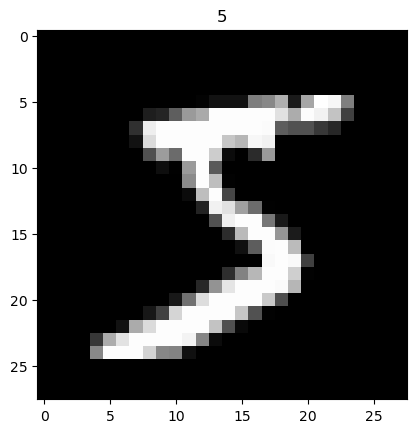

In [65]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

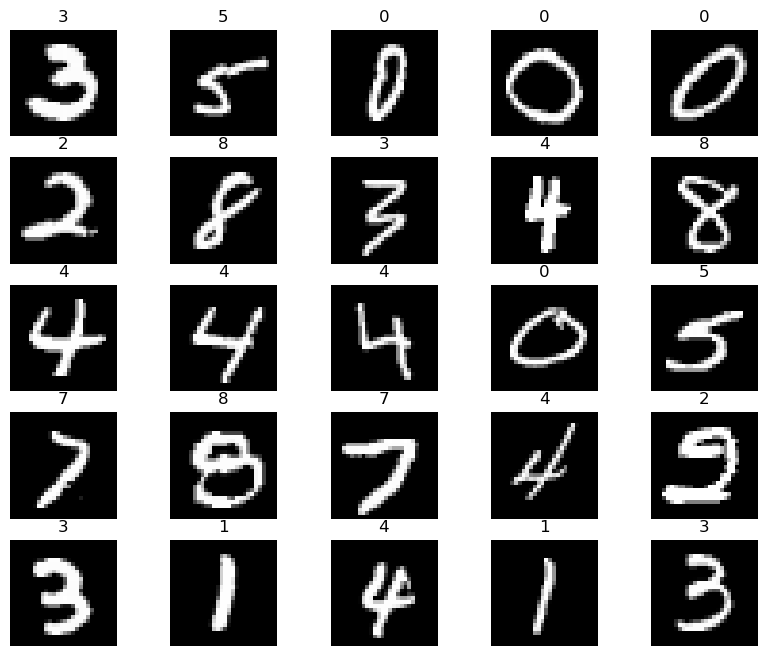

In [66]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Split the training dataset into training and validation datasets

In [67]:
from sklearn.model_selection import train_test_split
print(len(train_data))
# your code here
train_data, val_data = train_test_split(train_data, test_size = 0.1, random_state = 123, shuffle = True)
print(len(test_data))

60000
10000


### Prepare for the datasets using dataloader

In [68]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    'val'  : torch.utils.data.DataLoader(val_data, 
                                          batch_size=100, 
                                          shuffle=False, 
                                          num_workers=1),
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=False, 
                                          num_workers=1),
}

### Import nn module from torch

In [69]:
from torch import nn
import torch.nn.functional as F

### Set hyperparameters

In [77]:
# Set hyperparameters before building the model
num_classes = 10 #the number of classes in the classification problem
batch_size = 100 #어디서 쓰이는 hyperparameter인지..?
num_epochs = 10
learning_rate = 0.01

### Build a MLP model for image classification task

In [71]:
class MLP(nn.Module):
    def __init__(self, num_classes):
        super(MLP, self).__init__()        
        # your code here
        layers = list()
        layers.append(nn.Linear(784, 512))
        layers.append(nn.ReLU())
        layers.append(nn.Linear(512, num_classes))
        self.mlp = nn.Sequential(*layers)
        
        
                
    def forward(self, x):
        # your code here
        x = self.mlp(x)
        
        return x# your code here
        

model = MLP(num_classes).to(device)
print(model)

MLP(
  (mlp): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Set a loss function

In [72]:
loss_func = nn.CrossEntropyLoss()  # your code here

### Set an optimizer

In [73]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr=learning_rate)   # your code here

### Train the MLP Model

In [74]:
def train(num_epochs, model, loaders):
        
    total_step = len(loaders['train'])
    print(total_step)
    for epoch in range(num_epochs):
        # Train the model
        # your code here
        total_loss = 0.0
        for i, (image, label) in enumerate(loaders['train']):
            image = image.reshape(-1, 784).to(device)
            label = label.to(device)
            
            output = model(image)
            loss = loss_func(output, label)
            total_loss += loss
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            #if i==len(loaders['train'])-1:
                #print(total_loss / len(loaders['train']))
        
        # Validate the model
        # your code here
        with torch.no_grad():
            total_right = 0
            for image, label in loaders['val']:
                image = image.reshape(-1, 784).to(device)
                label = label.to(device)
            
                output = model(image)
                loss = loss_func(output, label)
                total_loss += loss
                right = (output.max(1)[1] == label).sum()
                total_right += right
            print(total_loss / len(loaders['val']))
            print(total_right / len(loaders['val'].dataset))
                
            
        
        
        
        
train(num_epochs, model, loaders)

540
tensor(2.1051)
tensor(0.9547)
tensor(1.2235)
tensor(0.9648)
tensor(0.9398)
tensor(0.9675)
tensor(0.9218)
tensor(0.9628)
tensor(0.8648)
tensor(0.9675)
tensor(0.7976)
tensor(0.9690)
tensor(0.7386)
tensor(0.9677)
tensor(0.8003)
tensor(0.9712)
tensor(0.6647)
tensor(0.9752)
tensor(0.7068)
tensor(0.9707)


### Evaluate the trained MLP model (compute accuracy on the test dataset)

In [75]:
# Test the model
# your code here
with torch.no_grad():
    total_right = 0
    for image, label in loaders['test']:
        image = image.reshape(-1, 784).to(device)
        label = label.to(device)
        output = model(image)
        #print(output[0])
        #print(label)
        #print(output.max(1)[1])
        right = (output.max(1)[1] == label).sum()
        #print(right)
        total_right += right
    print(total_right)
    print(len(loaders['test'].dataset))
    print(f"average accuracy : {total_right/len(loaders['test'].dataset)}")




tensor(9725)
10000
average accuracy : 0.9725000262260437


### Show the results with randomly selected 10 samples from the test data

In [76]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
imgs = imgs.view(-1, 28 * 28)
lbls = lbls
test_output = model(imgs[:10])
predicted = torch.max(test_output, 1)[1].data.cpu().numpy().squeeze()
labels = lbls[:10].cpu().numpy()
print(f"Predicted number: {predicted}")
print(f"Actual number:    {labels}")

Predicted number: [7 2 1 0 4 1 4 9 5 9]
Actual number:    [7 2 1 0 4 1 4 9 5 9]
